In [1]:
### Data analysis over 10 years of hourly energy consumption data from PJM in Megawatts

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import datetime
%matplotlib inline

In [3]:
df=pd.read_csv('data/AEP_hourly.csv')
df

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
...,...,...
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [5]:
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [7]:
df["New_Date"]=pd.to_datetime(df['Datetime']).dt.date
df["New_Time"]=pd.to_datetime(df['Datetime']).dt.time

In [8]:
df1=df
df1.head(4)

,Datetime,AEP_MW,New_Date,New_Time
0,2004-12-31 01:00:00,13478.0,2004-12-31,01:00:00
1,2004-12-31 02:00:00,12865.0,2004-12-31,02:00:00
2,2004-12-31 03:00:00,12577.0,2004-12-31,03:00:00
3,2004-12-31 04:00:00,12517.0,2004-12-31,04:00:00


### When was the highest Energy Consumption and which year
Maximum

In [11]:
df1[df1["AEP_MW"]==df["AEP_MW"].max()]

,Datetime,AEP_MW,New_Date,New_Time
30221,2008-10-20 14:00:00,25695.0,2008-10-20,14:00:00


###  When was the lowest Energy Consumption and which year
minimum

In [12]:
df1[df1["AEP_MW"]==df["AEP_MW"].min()]

,Datetime,AEP_MW,New_Date,New_Time
100759,2016-10-02 05:00:00,9581.0,2016-10-02,05:00:00


#### Conclusion: Maximum energy consumed during 2008-10-20 at 14:00:00 and it was 25695.0 MW,Minimum energy consumed during 2016-10-02 at 5:00:00 and it was 9581.0 MW


### Plot and Data visualization

c:\users\shree\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AEP_MW', ylabel='Density'>

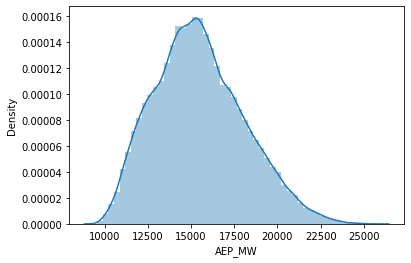

In [16]:
  sns.distplot(df1["AEP_MW"])

### Extract Date  and Time

In [17]:
df1.head(2)

,Datetime,AEP_MW,New_Date,New_Time
0,2004-12-31 01:00:00,13478.0,2004-12-31,01:00:00
1,2004-12-31 02:00:00,12865.0,2004-12-31,02:00:00


In [18]:
df1["Year"]=pd.DatetimeIndex(df["New_Date"]).year

In [19]:
df1.head(2)

,Datetime,AEP_MW,New_Date,New_Time,Year
0,2004-12-31 01:00:00,13478.0,2004-12-31,01:00:00,2004
1,2004-12-31 02:00:00,12865.0,2004-12-31,02:00:00,2004


### Check how many years are unique

In [22]:
df1['Year'].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018], dtype=int64)

### This tell us that there are 10 Unique Year from 2004 to 2018

In [24]:
df1[df1["Year"]==2013].nunique()

Datetime    8758
AEP_MW      5601
New_Date     365
New_Time      24
Year           1
dtype: int64

### Show the relationship of Energy vs Year

<AxesSubplot:xlabel='Year', ylabel='AEP_MW'>

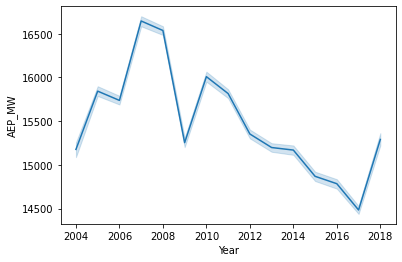

In [25]:
sns.lineplot(x=df1["Year"],y=df1["AEP_MW"],data=df1)

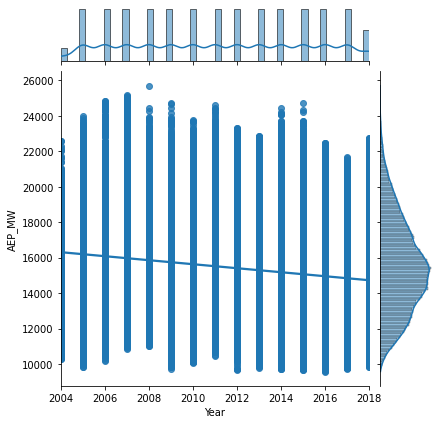

In [26]:
sns.jointplot(x=df1["Year"],y=df1["AEP_MW"],data=df1,kind="reg")

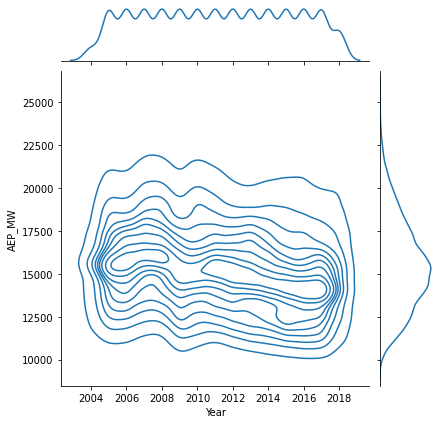

In [27]:
sns.jointplot(x=df1["Year"],y=df1["AEP_MW"],data=df1,kind='kde')